In [4]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Reading the CSV file
df=pd.read_csv("nyc_taxi_trip_duration.csv")

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [7]:
#Finding the shape of the dataset
df.shape

(729322, 11)

In [8]:
#Check columns present
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
#Checking for datatypes in all the column
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
#Exploring the statistical function
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


# Feature Engineering

In [11]:
# Changing the pickup_datetime and dropoff_datetime from object to datetime datatype
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [12]:
# Checking to new datatype.
print(df['pickup_datetime'].dtypes)
print(df['dropoff_datetime'].dtypes)

datetime64[ns]
datetime64[ns]


In [13]:
#Extracting seperate details from datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_min'] = df['pickup_datetime'].dt.minute
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_min'] = df['dropoff_datetime'].dt.minute
#As the Date and time columns in the Dataset has lot of information in it, we have to fetch them as separate feature

Univariate analysis on some Categorical Data

Text(0.5, 1.0, 'Vendor ID')

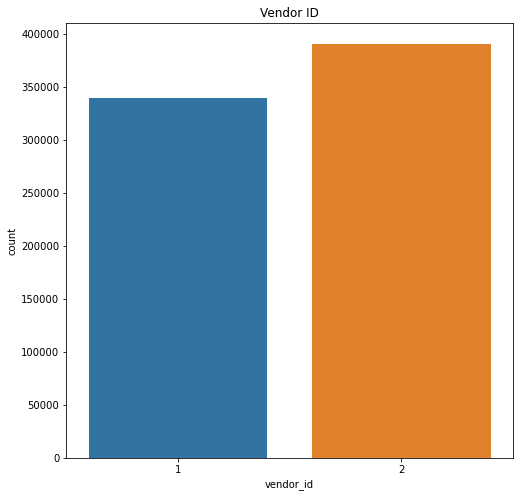

In [14]:
#Polt graph for Count vs Vendor ID
plt.figure(figsize=(8,8))
sns.countplot(df['vendor_id'])
plt.title("Vendor ID")

Text(0.5, 1.0, 'Passenger count')

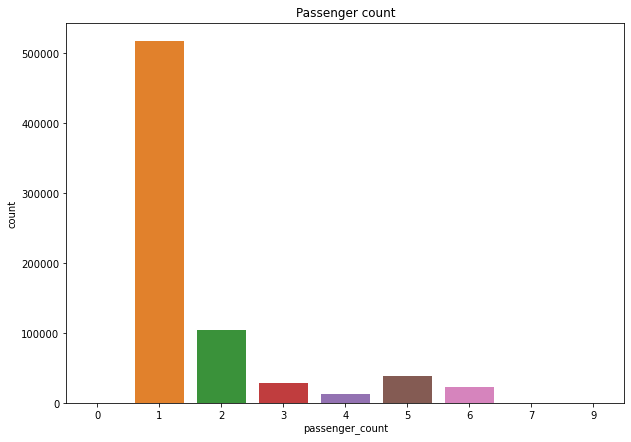

In [15]:
#Plot graph for Count vs Passenger count
plt.figure(figsize=(10,7))
sns.countplot(df['passenger_count'])
plt.title("Passenger count")

Text(0.5, 1.0, 'Store and Forward flag')

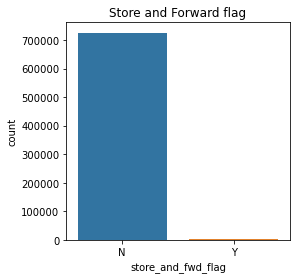

In [18]:
#store and forward flag
plt.figure(figsize=(4,4))
sns.countplot(df['store_and_fwd_flag'])
plt.title("Store and Forward flag")

Visualization 1: From two Vendor IDs second one is preferred slightly more than the first one.
Visualization 2: Most number of trips are done by single passenger. Trips with 5-9 passenger counts always used larger vehicle
Visulaization 3: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip).
Visualization tells us that there were very few trips of which the records that were stored in memory due to no connectivity to the server.

In [14]:
#Converting Yes/No to 1/0 with the help of label encoder
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])

Converting to binary value will help in easy computation.

<AxesSubplot:xlabel='trip_duration'>

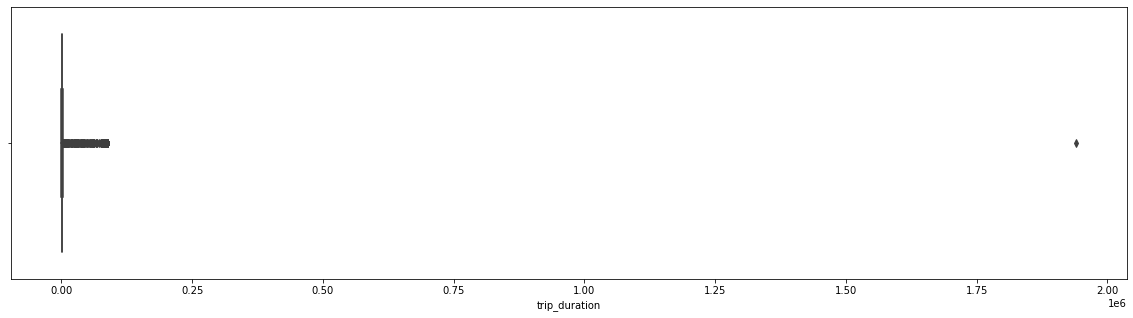

In [15]:
#Checking outliers
plt.figure(figsize=(20,5))
sns.boxplot(df['trip_duration'])

Text(0.5, 1.0, 'Log Transformed - Trip Duration')

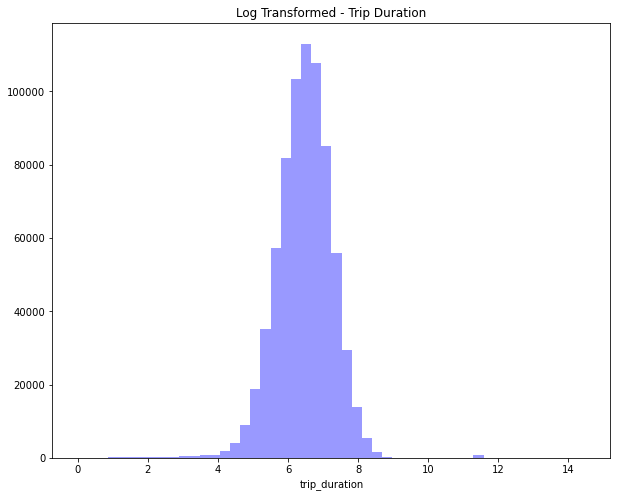

In [16]:
#Log Transformation
plt.figure(figsize=(10,8))
sns.distplot(np.log(df['trip_duration']), kde=False, color='blue')
plt.title("Log Transformed - Trip Duration")


Log Transformation is used as it smoothens outliers by giving them less weightage.

In [17]:
##Checking outlier-maximum row
df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,0,1939736,5,1,2016-01-05,0,19,1,8


In [18]:
#Dropping outlier-maxium row
df.drop(df[df['trip_duration'] == 1939736.00].index, inplace = True)

In [19]:
#Checking the new maxium
df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
259437,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,0,86391,31,5,2016-05-31,13,0,1,0


Text(0.5, 1.0, 'Overall Monthly trips')

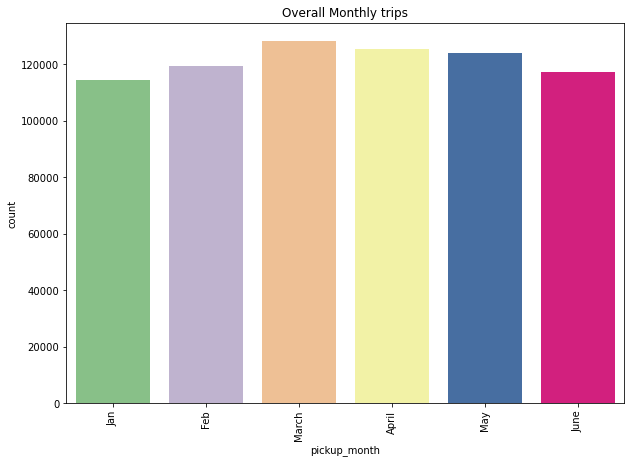

In [20]:
#monthly trips exploration
plt.figure(figsize=(10,7))
sns.countplot(df['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'], rotation=90)
plt.title('Overall Monthly trips')


According to 6 month data. Number of trips in a particular month - March and April marking the highest. January being lowest.

Text(0.5, 1.0, 'Hourly Pickups')

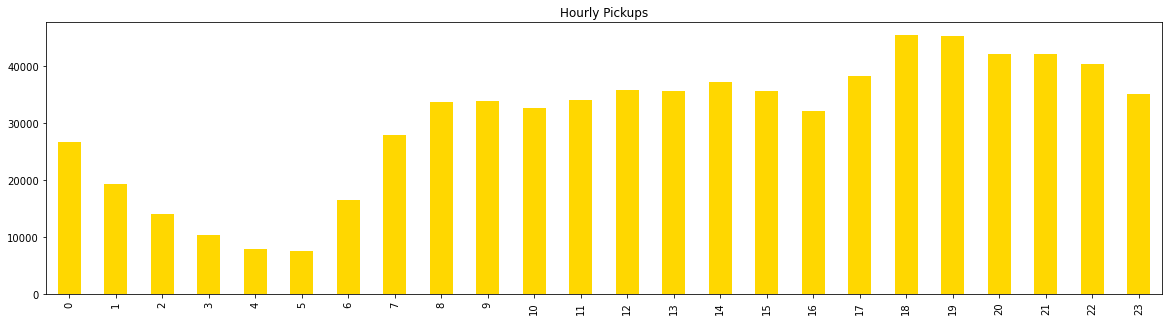

In [21]:
#Analysis of hourly pickups
plt.figure(figsize=(20,5))
pickup_hour = df['pickup_hour'].value_counts()
pickup_hour.sort_index().plot(kind='bar', color='gold')
plt.title("Hourly Pickups")


Text(0.5, 1.0, 'Overall Week day Trips')

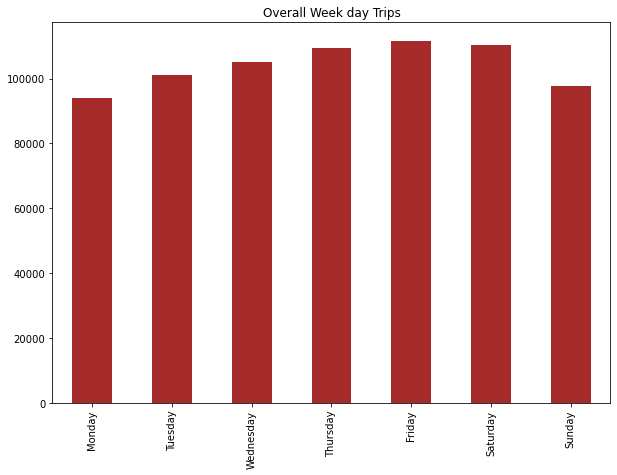

In [22]:
#Analysis of week day trips
plt.figure(figsize=(10,7))
pickup_week = df['pickup_weekday'].value_counts()
pickup_week.sort_index().plot(kind='bar', color='brown')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.title('Overall Week day Trips')

Observations-Fridays and Saturdays have the most number of trips.

Text(0.5, 1.0, 'Daily Trips Plot')

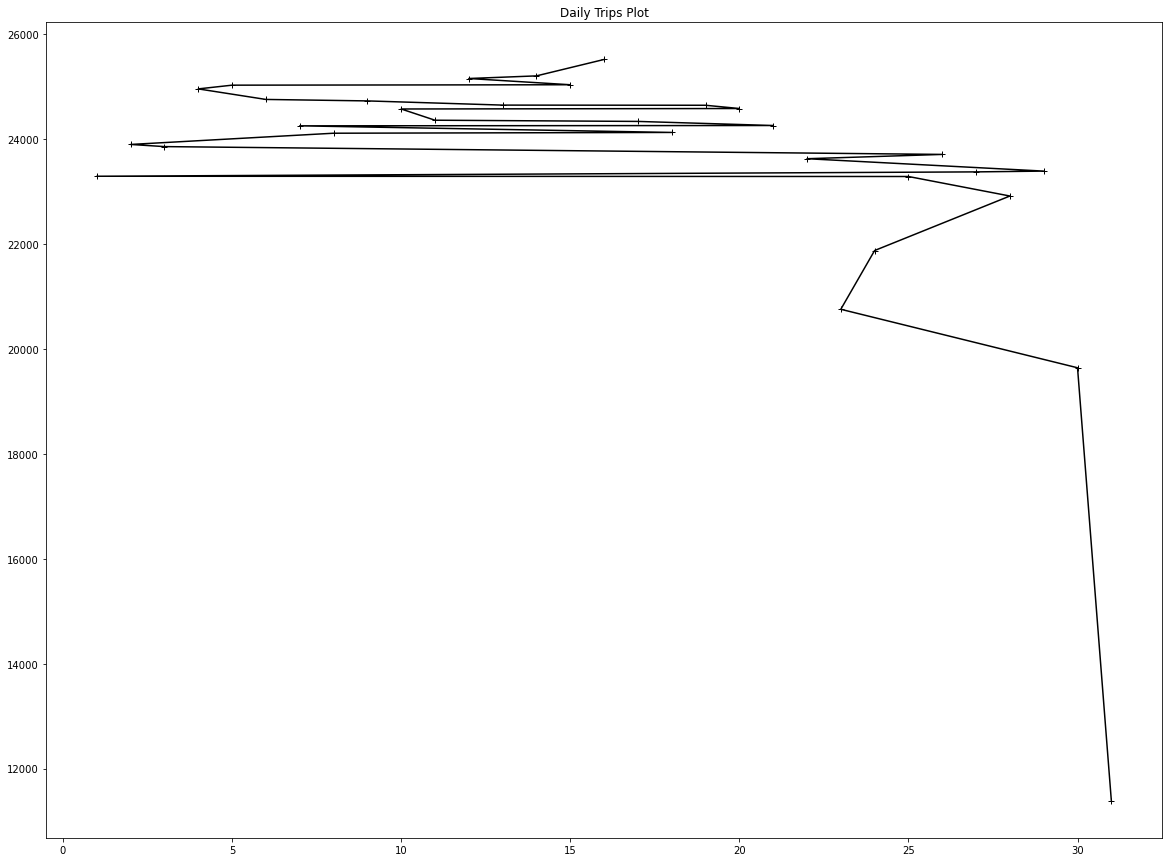

In [23]:
#Analysis of Daily trip
plt.figure(figsize=(20,15))
df['pickup_day'].value_counts().plot(color="black", marker="+")
plt.title('Daily Trips Plot')


Text(0.5, 1.0, 'Correlation Plot')

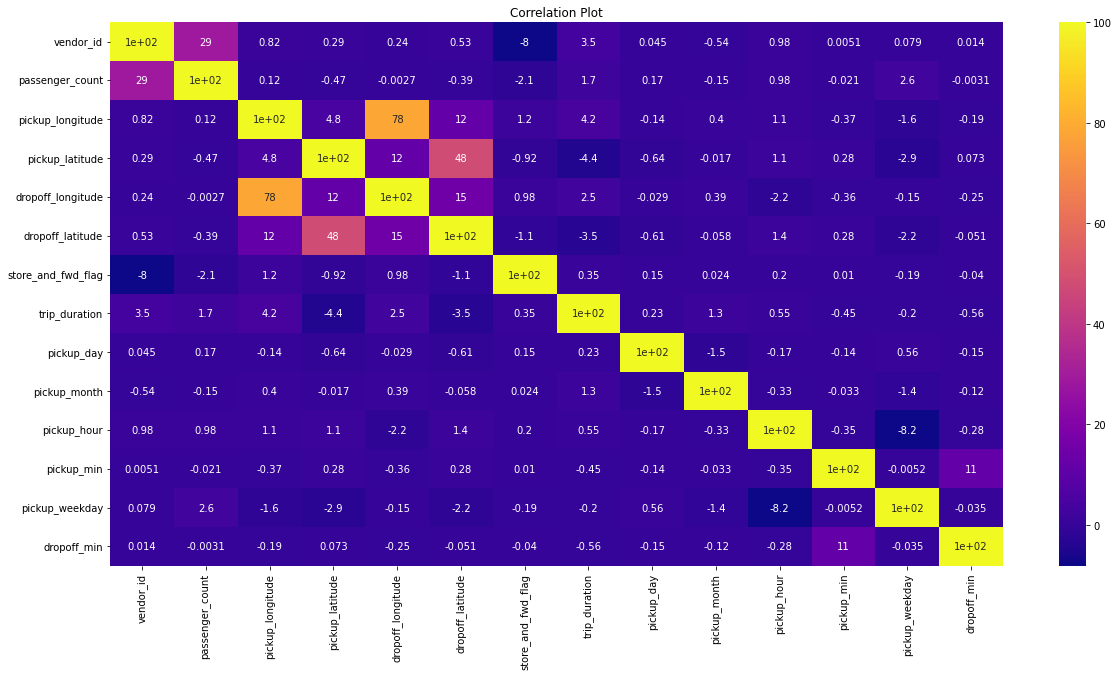

In [24]:
#Pearson Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr()*100, annot=True, cmap='plasma')
plt.title('Correlation Plot')

In [25]:
#dropping unwanted columns
nyc_taxi_df = df.drop(['id','pickup_datetime','dropoff_datetime'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,400,29,2,2016-02-29,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,11,3,2016-03-11,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,21,2,2016-02-21,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,5,1,2016-01-05,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,848,17,2,2016-02-17,6,42,2,56


In [26]:
#Predictors and Target Variable
X1 = nyc_taxi_df.drop(['trip_duration'], axis=1)
Y1 = np.log(nyc_taxi_df['trip_duration'])

In [27]:
X1.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,29,2,2016-02-29,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,11,3,2016-03-11,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,21,2,2016-02-21,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,5,1,2016-01-05,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,17,2,2016-02-17,6,42,2,56


In [28]:
del X1['pickup_date']
X1


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,29,2,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,11,3,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,21,2,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,5,1,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,17,2,6,42,2,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2,-73.965919,40.789780,-73.952637,40.789181,0,21,5,13,29,5,34
729318,1,1,-73.996666,40.737434,-74.001320,40.731911,0,22,2,0,43,0,48
729319,1,1,-73.997849,40.761696,-74.001488,40.741207,0,15,4,18,56,4,8
729320,1,1,-74.006706,40.708244,-74.013550,40.713814,0,19,6,9,50,6,58


In [29]:
# Normalising Predictors and creating new dataframe
from sklearn.preprocessing import StandardScaler
cols = X1.columns
ss = StandardScaler()
new_df = ss.fit_transform(X1)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,0.931531,-0.504444,0.280916,0.832128,0.137199,0.538014,-0.074634,1.551525,-0.903464,0.373004,0.600159,-1.560058,0.997049
1,-1.073501,0.257492,-0.212153,-0.570823,-0.306500,-1.577380,-0.074634,-0.517497,-0.308459,1.466270,0.311682,0.486534,1.341480
2,0.931531,0.257492,-0.341218,-0.876963,0.364913,0.642175,-0.074634,0.631959,-0.903464,0.529185,1.696373,1.509831,-0.208457
3,0.931531,3.305238,0.169789,0.261977,0.239160,0.800639,-0.074634,-1.207171,-1.498469,-0.720262,0.830941,-1.048410,-1.528773
4,-1.073501,-0.504444,-0.625159,-1.263612,-0.212103,-0.309244,-0.074634,0.172177,-0.903464,-1.188804,0.715550,-0.536762,1.513695


# Linear Regression-Regularization

In [30]:
#importing train test split & some important metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error
from sklearn.linear_model import ridge_regression
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.30, random_state=10)
X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape

((510524, 13), (218797, 13), (510524,), (218797,))

In [31]:
#implenting linear regression
from sklearn.linear_model import Ridge
est_lr = Ridge()
est_lr.fit(X1_train, Y1_train)
lr_pred = est_lr.predict(X1_test)
lr_pred


array([6.60241328, 6.28940689, 6.63826216, ..., 6.34952136, 6.43157002,
       6.71107241])

In [32]:
#Intercept & Coef
est_lr.intercept_, est_lr.coef_

(322.8461953623118,
 array([ 2.40628281e-02,  9.53882699e-03,  1.19776494e+00, -3.47905386e+00,
         2.55269472e-02, -2.06800480e+00,  1.48217377e-01,  8.78450337e-04,
         2.23440463e-02,  4.70174895e-03, -3.49093467e-04, -1.22581531e-02,
        -8.23557421e-05]))

In [33]:
lr_pred[lr_pred<0]=0

In [34]:
#Examining metrics
print ("Training Score : " , est_lr.score(X1_train, Y1_train))
print ("Test Score : ", est_lr.score(X1_test, Y1_test))
print ("Cross Validation Score : " ,cross_val_score(est_lr, X1_train, Y1_train, cv=5).mean())
print ("R2_Score : ", r2_score(lr_pred, Y1_test))
print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, Y1_test)))

Training Score :  0.04987829803111876
Test Score :  0.028501657290273652
Cross Validation Score :  -0.03864753197370394
R2_Score :  -15.094166075967774
RMSLE :  0.11251052838672529


In [35]:
lr_train_score=est_lr.score(X1_train, Y1_train)
lr_test_score=est_lr.score(X1_test, Y1_test)

# KNN Model
Segregating Independent and Dependent Variables

In [36]:
#Predictors and Target Variable
X2 = nyc_taxi_df.drop(['trip_duration'], axis=1)
Y2 = np.log(nyc_taxi_df['trip_duration'])


In [37]:
X2.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,29,2,2016-02-29,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,11,3,2016-03-11,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,21,2,2016-02-21,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,5,1,2016-01-05,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,17,2,2016-02-17,6,42,2,56


In [38]:
del X2['pickup_date']
X2

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,29,2,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,11,3,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,21,2,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,5,1,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,17,2,6,42,2,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2,-73.965919,40.789780,-73.952637,40.789181,0,21,5,13,29,5,34
729318,1,1,-73.996666,40.737434,-74.001320,40.731911,0,22,2,0,43,0,48
729319,1,1,-73.997849,40.761696,-74.001488,40.741207,0,15,4,18,56,4,8
729320,1,1,-74.006706,40.708244,-74.013550,40.713814,0,19,6,9,50,6,58


Scaling the date

In [39]:
#Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_scaled=scaler.fit_transform(X2)

In [40]:
X2=pd.DataFrame(x_scaled,columns=X2.columns)

In [41]:
X2.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,1.0,0.111111,0.856226,0.353352,0.856048,0.731696,0.0,0.933333,0.2,0.695652,0.677966,0.000000,0.796610
1,0.0,0.222222,0.855612,0.350606,0.855497,0.725202,0.0,0.333333,0.4,1.000000,0.593220,0.666667,0.898305
2,1.0,0.222222,0.855451,0.350007,0.856331,0.732015,0.0,0.666667,0.2,0.739130,1.000000,1.000000,0.440678
3,1.0,0.666667,0.856087,0.352236,0.856174,0.732502,0.0,0.133333,0.0,0.391304,0.745763,0.166667,0.050847
4,0.0,0.111111,0.855098,0.349251,0.855614,0.729095,0.0,0.533333,0.2,0.260870,0.711864,0.333333,0.949153


In [42]:
#Importing train test split function
from sklearn.model_selection import train_test_split
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,random_state=56)

In [43]:

#Importing KNN and metric mse
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse


In [44]:
#Creating instance of KNN
est_knn= KNN(n_neighbors=8)
#Fitting the model
est_knn.fit(X2_train,Y2_train)
#Predicting over train set and calculating MSE
knn_predict=est_knn.predict(X2_test)
k=mse(knn_predict,Y2_test)
print('Test MSE ',k)


Test MSE  0.2448607845751628


In [45]:
def Elbow(K):
    #initiating empty list
    test_mse=[]
 
    for i in K:
        #Instance of knn
        est_knn=KNN(n_neighbors=i)
        est_knn.fit(X1_train,Y1_train)
        #Appending mse value to the empty list calculated using the predictions
        tmp=est_knn.predict(X1_test)
        tmp=mse(tmp,Y1_test)
        test_mse.append(tmp)
    return test_mse

In [46]:
#Defining K range
k=range(1,10)

In [47]:
#Calling above defined function
test=Elbow(k)

Text(0.5, 1.0, 'Elbow curve')

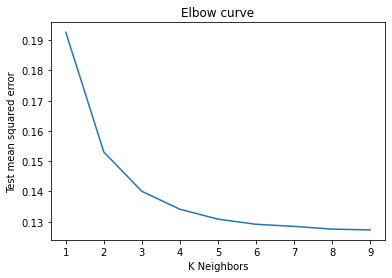

In [48]:
#Plotting the curves
plt.plot(k,test)
plt.xlabel('K Neighbors')
plt.ylabel('Test mean squared error')
plt.title('Elbow curve')


In [49]:
#Creating instance of KNN
est_knn= KNN(n_neighbors=5)
#Fitting the model
est_knn.fit(X2_train,Y2_train)
#Predicting over train set and calculating F1
knn_predict=est_knn.predict(X2_test)
k=mse(knn_predict,Y2_test)
print('Test MSE ',k)

Test MSE  0.24186190869423205


In [50]:
est_knn.score(X2_train,Y2_train)

0.7552177916514087

In [51]:
est_knn.score(X2_test,Y2_test)

0.6215407886307147

In [52]:

print ("Training Score : " , est_knn.score(X2_train,Y2_train))
print ("Test Score : ", est_knn.score(X2_test,Y2_test))
print ("Cross Validation Score : " , cross_val_score(est_knn, X2_train,Y2_train, cv=5).mean())
print ("R2_Score : ", r2_score(knn_predict, Y2_test))
print ("RMSLE : ", np.sqrt(mean_squared_log_error(knn_predict, Y2_test)))

Training Score :  0.7552177916514087
Test Score :  0.6215407886307147
Cross Validation Score :  0.6030418710335667
R2_Score :  0.3041581436001589
RMSLE :  0.07486541495327768


# Decision Tree

In [53]:
#Predictors and Target Variable
X3 = nyc_taxi_df.drop(['trip_duration'], axis=1)
Y3 = np.log(nyc_taxi_df['trip_duration'])


In [54]:
#Importing train test split function
from sklearn.model_selection import train_test_split
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3,Y3,random_state=56)

In [55]:
X3.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,29,2,2016-02-29,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,11,3,2016-03-11,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,21,2,2016-02-21,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,5,1,2016-01-05,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,17,2,2016-02-17,6,42,2,56


In [56]:
del X3['pickup_date']
X3

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,29,2,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,11,3,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,21,2,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,5,1,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,17,2,6,42,2,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2,-73.965919,40.789780,-73.952637,40.789181,0,21,5,13,29,5,34
729318,1,1,-73.996666,40.737434,-74.001320,40.731911,0,22,2,0,43,0,48
729319,1,1,-73.997849,40.761696,-74.001488,40.741207,0,15,4,18,56,4,8
729320,1,1,-74.006706,40.708244,-74.013550,40.713814,0,19,6,9,50,6,58


In [57]:
X3_test

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
14908,1,1,-74.010452,40.714401,-73.793289,40.769981,0,5,3,2016-03-05,0,6,5,46
223797,2,6,-73.978699,40.740879,-73.974312,40.731972,0,14,4,2016-04-14,20,47,3,54
582523,1,1,-74.008141,40.747730,-73.975601,40.733147,0,6,2,2016-02-06,7,35,5,50
382010,2,1,-73.975029,40.732937,-73.984573,40.739433,0,14,1,2016-01-14,11,18,3,26
619444,2,1,-73.977249,40.750408,-73.983612,40.729889,0,1,1,2016-01-01,17,47,4,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,2,1,-73.986847,40.732433,-73.983620,40.750175,0,26,3,2016-03-26,19,10,5,23
367651,2,1,-73.870979,40.773548,-73.975166,40.759689,0,21,2,2016-02-21,19,34,6,57
662742,2,1,-73.987663,40.769760,-73.996696,40.752838,0,30,6,2016-06-30,18,10,3,51
142742,1,1,-73.991600,40.727104,-74.015015,40.710056,0,15,1,2016-01-15,0,37,4,49


In [58]:
del X3_test['pickup_date']
X3_test

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
14908,1,1,-74.010452,40.714401,-73.793289,40.769981,0,5,3,0,6,5,46
223797,2,6,-73.978699,40.740879,-73.974312,40.731972,0,14,4,20,47,3,54
582523,1,1,-74.008141,40.747730,-73.975601,40.733147,0,6,2,7,35,5,50
382010,2,1,-73.975029,40.732937,-73.984573,40.739433,0,14,1,11,18,3,26
619444,2,1,-73.977249,40.750408,-73.983612,40.729889,0,1,1,17,47,4,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,2,1,-73.986847,40.732433,-73.983620,40.750175,0,26,3,19,10,5,23
367651,2,1,-73.870979,40.773548,-73.975166,40.759689,0,21,2,19,34,6,57
662742,2,1,-73.987663,40.769760,-73.996696,40.752838,0,30,6,18,10,3,51
142742,1,1,-73.991600,40.727104,-74.015015,40.710056,0,15,1,0,37,4,49


In [59]:
X3_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
679696,2,2,-73.985054,40.779610,-73.948792,40.777779,0,16,1,2016-01-16,13,35,5,50
9901,1,1,-73.982933,40.738953,-73.975517,40.752033,0,19,3,2016-03-19,21,9,5,14
233143,2,2,-73.986511,40.734619,-73.991272,40.731602,0,6,2,2016-02-06,21,14,5,17
474452,1,3,-73.978706,40.772621,-73.988457,40.763905,0,31,5,2016-05-31,17,40,1,46
556882,1,1,-73.990196,40.756378,-73.968597,40.791595,0,26,2,2016-02-26,11,1,4,19


In [60]:
del X3_train['pickup_date']
X3_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
679696,2,2,-73.985054,40.779610,-73.948792,40.777779,0,16,1,13,35,5,50
9901,1,1,-73.982933,40.738953,-73.975517,40.752033,0,19,3,21,9,5,14
233143,2,2,-73.986511,40.734619,-73.991272,40.731602,0,6,2,21,14,5,17
474452,1,3,-73.978706,40.772621,-73.988457,40.763905,0,31,5,17,40,1,46
556882,1,1,-73.990196,40.756378,-73.968597,40.791595,0,26,2,11,1,4,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681196,1,1,-73.971725,40.763458,-74.000931,40.736107,0,11,5,19,6,2,33
505251,2,5,-73.789360,40.641479,-73.849609,40.790310,0,18,2,16,32,3,5
134337,2,1,-73.872993,40.774059,-73.967873,40.763790,0,2,6,11,2,3,53
688528,2,1,-73.980492,40.759296,-73.948509,40.830597,0,21,3,23,49,0,9


In [61]:
# implementation of decision tree
from sklearn.tree import DecisionTreeRegressor
est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X3_train, Y3_train)
dt_pred = est_dt.predict(X3_test)
dt_pred


array([7.4351579 , 6.13859899, 6.05042142, ..., 6.33006741, 6.48057493,
       6.04408815])

In [62]:
#examining metrics
print ("Training Score : " , est_dt.score(X3_train, Y3_train))
print ("Test Score : ", est_dt.score(X3_test, Y3_test))
print ("Cross Validation Score : " , cross_val_score(est_dt, X3_train, Y3_train, cv=5).mean())
print ("R2_Score : ", r2_score(dt_pred, Y3_test))
print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, Y3_test)))

Training Score :  0.46608688409513566
Test Score :  0.4570793298303435
Cross Validation Score :  0.44255394612617954
R2_Score :  -0.16509885208886899
RMSLE :  0.08790521597146264


## Training scores of all the models

Text(0.5, 1.0, 'Training Scores')

<Figure size 720x504 with 0 Axes>

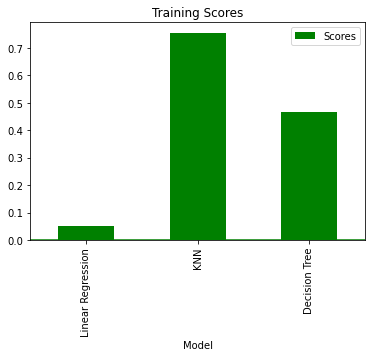

In [63]:
plt.figure(figsize=(10,7))
Training_score = pd.DataFrame({'Scores':np.array([est_lr.score(X1_train, Y1_train),est_knn.score(X2_train, Y2_train),est_dt.score(X3_train, Y3_train) ]), 'Model':np.array(['Linear Regression','KNN','Decision Tree'])})
Training_score.set_index('Model').plot(kind="bar", color="green")
plt.axhline(y=0, color='g')
plt.title("Training Scores")


## Test Scores of all the models

Text(0.5, 1.0, 'Test Scores')

<Figure size 720x504 with 0 Axes>

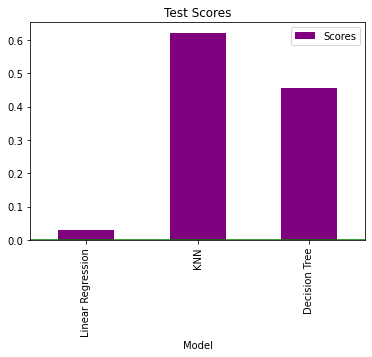

In [64]:
plt.figure(figsize=(10,7))
Test_score = pd.DataFrame({'Scores':np.array([est_lr.score(X1_test, Y1_test),est_knn.score(X2_test, Y2_test),est_dt.score(X3_test, Y3_test)]), 'Model':np.array(['Linear Regression','KNN','Decision Tree'])})
Test_score.set_index('Model').plot(kind="bar", color="purple")
plt.axhline(y=0, color='g')
plt.title("Test Scores")


R2 scores of all th models

Text(0.5, 1.0, 'R2 Scores')

<Figure size 720x504 with 0 Axes>

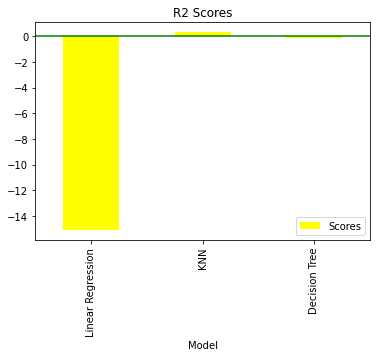

In [65]:
#r2 score plot for all the models
plt.figure(figsize=(10,7))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, Y1_test),r2_score(knn_predict,Y2_test),r2_score(dt_pred, Y3_test)]), 'Model':np.array(['Linear Regression','KNN','Decision Tree'])})
r2.set_index('Model').plot(kind="bar", color="yellow")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")


In [66]:
lr_pred[lr_pred<0]=0

## RMSE scores of all the models


Text(0.5, 1.0, 'RMSE - Lesser is Better')

<Figure size 720x720 with 0 Axes>

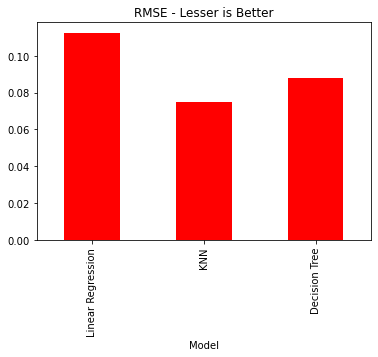

In [67]:
#RMSE plot
plt.figure(figsize=(10,10))
RMSE =  pd.DataFrame({'RMSE':np.array([np.sqrt(mean_squared_log_error(lr_pred, Y1_test)),np.sqrt(mean_squared_log_error(knn_predict, Y2_test)),np.sqrt(mean_squared_log_error(dt_pred,Y3_test))]),'Model':np.array(['Linear Regression','KNN','Decision Tree'])})
RMSE.set_index('Model').plot(kind="bar", color="red", legend=False)
plt.title("RMSE - Lesser is Better")


In [68]:
RMSE

,RMSE,Model
0,0.112511,Linear Regression
1,0.074865,KNN
2,0.087905,Decision Tree


From all the above observation and models used, we can conclude that KNN works the best!!